In [91]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.ndimage import gaussian_filter
import cv2

In [92]:

def visualize(arr: np.array, cmap: str = "viridis", flip: bool = False):
    img = np.copy(arr)
    img = img - img.min()
    img = img / img.max()
    plt.imshow(img, cmap=cmap, origin="upper")


def magnitude2(arrX: np.array, arrY: np.array):
    return np.sqrt(arrX**2 + arrY**2)


def interp2d(a, x, y):
    X = np.floor(x).astype(int)
    Y = np.floor(y).astype(int)
    fracX = x - X
    fracY = y - Y
    X = np.clip(X, 0, a.shape[0] - 2)
    Y = np.clip(Y, 0, a.shape[1] - 2)

    U1 = (1.0 - fracX) * a[X + 0, Y + 0] + fracX * a[X + 1, Y + 0]
    U2 = (1.0 - fracX) * a[X + 0, Y + 1] + fracX * a[X + 1, Y + 1]
    U = (1.0 - fracY) * U1 + fracY * U2
    return U

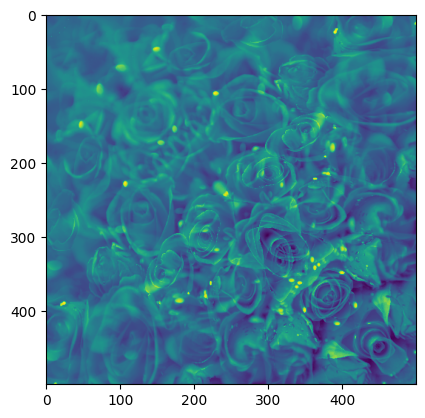

In [93]:
mesh_size = 500

# noise_u = np.random.normal(0, 1, [mesh_size, mesh_size])
# noise_v = np.random.normal(0, 1, [mesh_size, mesh_size])

# u = np.cumsum(np.cumsum(noise_u, axis=0), axis=1)
# v = np.cumsum(np.cumsum(noise_v, axis=0), axis=1)

# u = (u - u.min()) / (u.max() - u.min())
# v = (v - v.min()) / (v.max() - v.min())

# u = np.pow(gaussian_filter(u, sigma=20), 3.0)
# v = np.pow(gaussian_filter(v, sigma=20), 3.0)
# mag = magnitude2(u, v)


u = cv2.imread("roses.png")
u = cv2.resize(u, (mesh_size, mesh_size))
u = cv2.cvtColor(u, cv2.COLOR_BGR2GRAY)
u = u.astype(float)/255
v = u.T
mag = magnitude2(u, v)


visualize(mag)

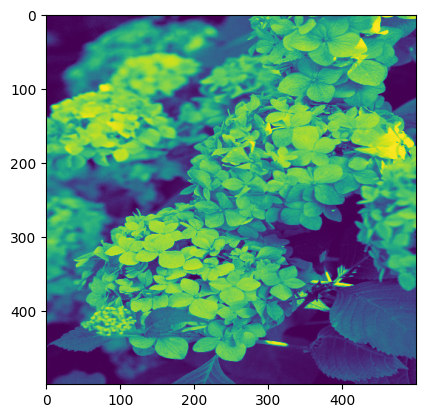

In [94]:
#generate noise texture
# n = np.random.random(u.shape)
img = cv2.imread("img.jpg")
img = cv2.resize(img, (mesh_size, mesh_size))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
n = img.astype(float)/255
plt.imshow(n)

In [95]:
# perform LIC
l = 500
dt = 0.15/ np.max(magnitude2(u, v))
h = np.exp(-np.linspace(-2, 2, l)**2)  

h /= h.sum()
kernel_magnitude = sum(h)

In [96]:
i = np.arange(0, mesh_size).astype(float)
j = np.arange(0, mesh_size).astype(float)
ii, jj = np.meshgrid(i, j)

In [97]:
F = np.zeros_like(n)

F = h[0]*interp2d(n, ii, jj)

# fwd
xx, yy = ii, jj
for k in range(1, l):
    print(f"{k}/{l}")
    tmp_xx = xx
    xx += interp2d(u, xx, yy) * dt
    yy += interp2d(v, tmp_xx, yy) * dt
    F += h[k] * interp2d(n, xx, yy)
# bwd
xx, yy = ii, jj
for k in range(1, l):
    print(f"{k}/{l}")
    tmp_xx = xx
    xx -= interp2d(u, xx, yy) * dt
    yy -= interp2d(v, tmp_xx, yy) * dt
    F += h[k] * interp2d(n, xx, yy)
F /= (2*kernel_magnitude)

1/500
2/500
3/500
4/500
5/500
6/500
7/500
8/500
9/500
10/500
11/500
12/500
13/500
14/500
15/500
16/500
17/500
18/500
19/500
20/500
21/500
22/500
23/500
24/500
25/500
26/500
27/500
28/500
29/500
30/500
31/500
32/500
33/500
34/500
35/500
36/500
37/500
38/500
39/500
40/500
41/500
42/500
43/500
44/500
45/500
46/500
47/500
48/500
49/500
50/500
51/500
52/500
53/500
54/500
55/500
56/500
57/500
58/500
59/500
60/500
61/500
62/500
63/500
64/500
65/500
66/500
67/500
68/500
69/500
70/500
71/500
72/500
73/500
74/500
75/500
76/500
77/500
78/500
79/500
80/500
81/500
82/500
83/500
84/500
85/500
86/500
87/500
88/500
89/500
90/500
91/500
92/500
93/500
94/500
95/500
96/500
97/500
98/500
99/500
100/500
101/500
102/500
103/500
104/500
105/500
106/500
107/500
108/500
109/500
110/500
111/500
112/500
113/500
114/500
115/500
116/500
117/500
118/500
119/500
120/500
121/500
122/500
123/500
124/500
125/500
126/500
127/500
128/500
129/500
130/500
131/500
132/500
133/500
134/500
135/500
136/500
137/500
138/500
139/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3291386905230684].


(np.float64(-0.5), np.float64(499.5), np.float64(499.5), np.float64(-0.5))

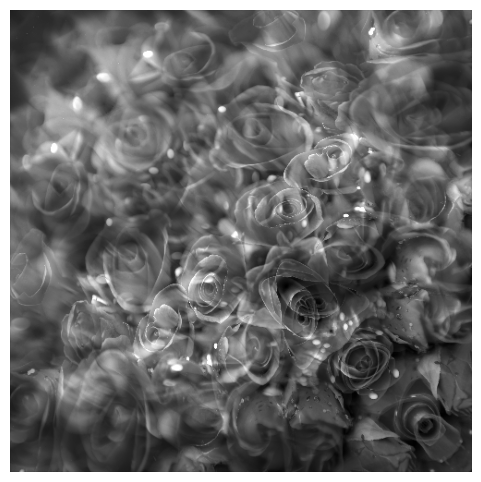

In [102]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_facecolor("black")

# normalize lic result
F_proc = np.copy(F.T)
F_proc[mag < 0.01] = 0.0
F_proc -= F_proc.min()
F_proc /= F_proc.max()

mag_proc = np.copy(mag)
mag_proc -= mag_proc.min()
mag_proc /= mag_proc.max()

cmap = plt.cm.gray(mag_proc)

cmap[..., :3] *= F_proc[..., np.newaxis] + 0.5

# plt.imshow(F_proc, cmap='gray')
plt.imshow(cmap, cmap='gray')
plt.axis('off')

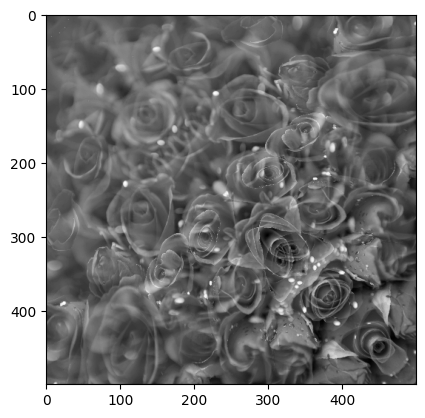

In [100]:
plt.imshow(mag, cmap='gray')
